<a href="https://colab.research.google.com/github/DevOpsNinja2/smart-health-prediction/blob/main/DIAMOND_PRICE_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt


In [4]:
data = pd.read_csv('/content/diamonds.csv')

In [5]:
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
data.tail()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [8]:
data.isnull().sum()

,0
Unnamed: 0,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0


In [9]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [10]:
data.isnull().any()

,0
Unnamed: 0,False
carat,False
cut,False
color,False
clarity,False
depth,False
table,False
price,False
x,False
y,False


In [11]:
data_encoded = pd.get_dummies(data, columns=['cut', 'color', 'clarity'], drop_first=True)

In [12]:
import seaborn as sns

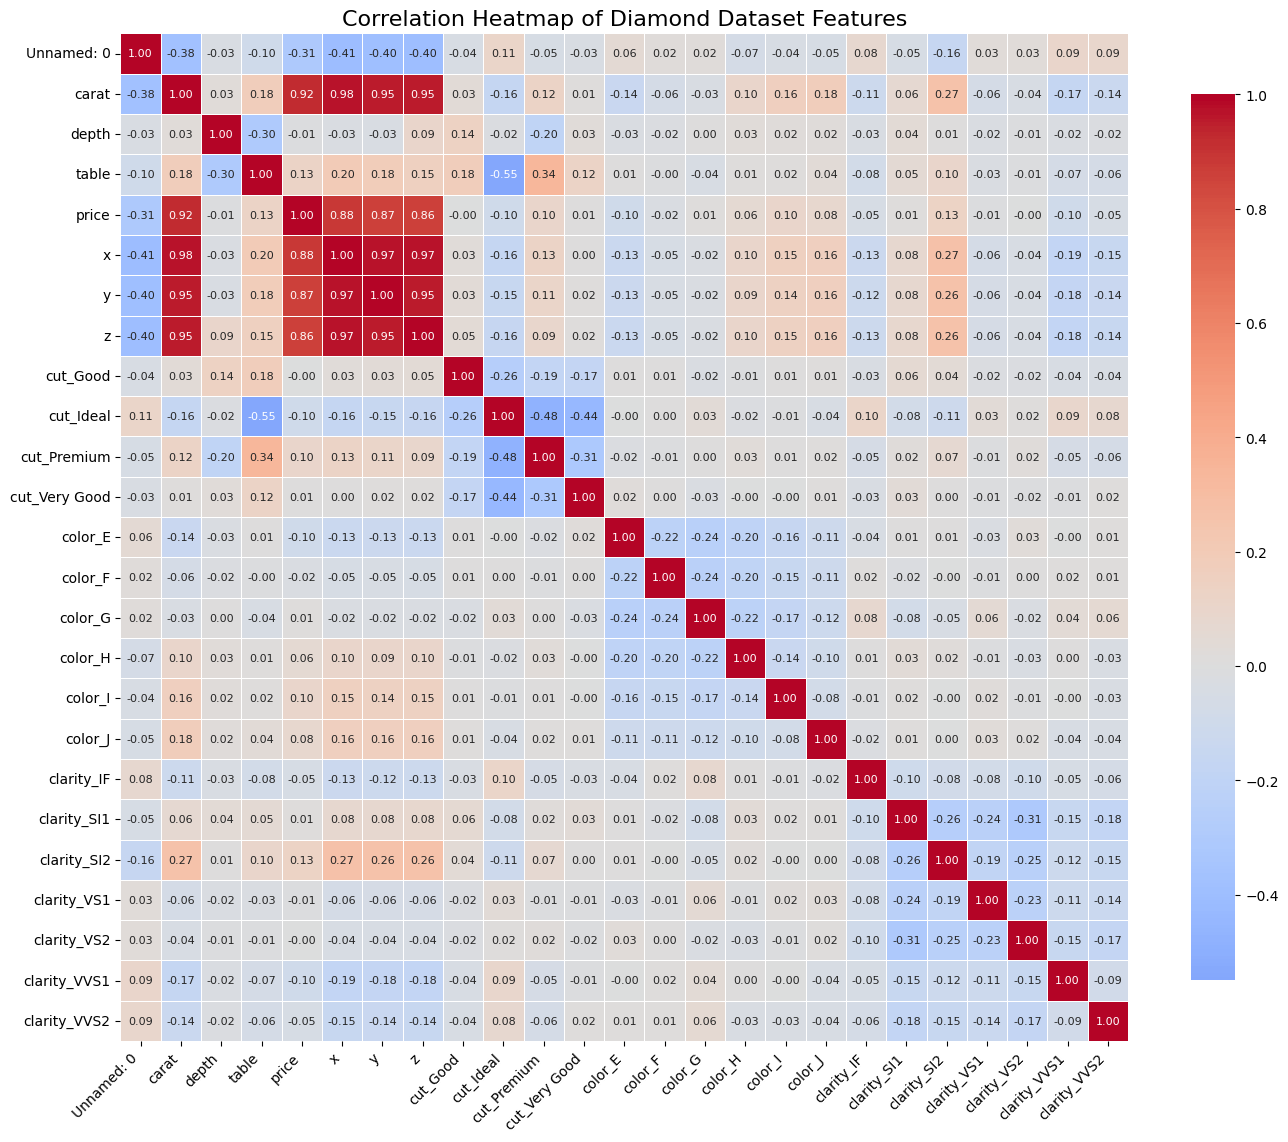

In [13]:
correlation_matrix = data_encoded.corr()


plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix,
            annot=True,
            fmt=".2f",
            cmap="coolwarm",
            center=0,
            linewidths=0.5,
            square=True,
            cbar_kws={"shrink": 0.8},
            annot_kws={"size": 8})


plt.title("Correlation Heatmap of Diamond Dataset Features", size=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

plt.show()

In [15]:
le = LabelEncoder()
data['cut'] = le.fit_transform(data['cut'])
data

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,2,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,3,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,1,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,3,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,1,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,2,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,1,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,4,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,3,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [16]:
le = LabelEncoder()
data['color'] = le.fit_transform(data['color'])
data['clarity'] = le.fit_transform(data['clarity'])
data

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,2,0,2,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,1,0,2,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,4,0,2,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,3,4,3,61.0,58.0,2757,6.15,6.12,3.74


In [28]:
x = data.drop(['price'], axis=1)
y = data.price

In [29]:
print(x)

       Unnamed: 0  carat  cut  color  clarity  depth  table     x     y     z
0               1   0.23    2      1        3   61.5   55.0  3.95  3.98  2.43
1               2   0.21    3      1        2   59.8   61.0  3.89  3.84  2.31
2               3   0.23    1      1        4   56.9   65.0  4.05  4.07  2.31
3               4   0.29    3      5        5   62.4   58.0  4.20  4.23  2.63
4               5   0.31    1      6        3   63.3   58.0  4.34  4.35  2.75
...           ...    ...  ...    ...      ...    ...    ...   ...   ...   ...
53935       53936   0.72    2      0        2   60.8   57.0  5.75  5.76  3.50
53936       53937   0.72    1      0        2   63.1   55.0  5.69  5.75  3.61
53937       53938   0.70    4      0        2   62.8   60.0  5.66  5.68  3.56
53938       53939   0.86    3      4        3   61.0   58.0  6.15  6.12  3.74
53939       53940   0.75    2      0        3   62.2   55.0  5.83  5.87  3.64

[53940 rows x 10 columns]


In [30]:
print(y)

0         326
1         326
2         327
3         334
4         335
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 53940, dtype: int64


In [31]:
x.shape

(53940, 10)

In [32]:
y.shape

(53940,)

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [34]:
x_train.shape

(43152, 10)

In [35]:
x_test.shape

(10788, 10)

In [36]:
y_train.shape

(43152,)

In [37]:
y_test.shape

(10788,)

In [38]:
mlr = LinearRegression()
mlr.fit(x_train, y_train)

LinearRegression()

In [39]:
y_prediction = mlr.predict(x_test)
y_prediction

array([5709.43463089, 6970.2889317 , 5901.16747693, ..., 6005.17443434,
       6100.7277968 , 2358.98927922])

In [40]:
y_test

,price
10176,4733
16083,6424
13420,5510
20407,8770
8909,4493
...,...
42208,1289
3638,3435
5508,3847
19535,8168


In [41]:
acc = r2_score(y_test, y_prediction)
acc

0.8877825513640047

In [42]:
y_test = list(y_test)

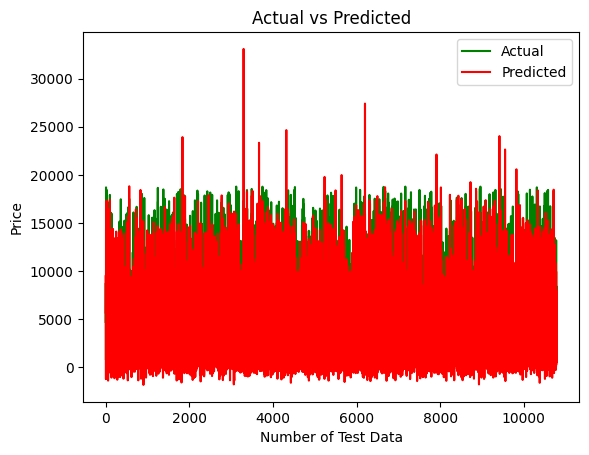

In [43]:
plt.plot(y_test, color='green', label='Actual')
plt.plot(y_prediction, color='red', label='Predicted')
plt.title('Actual vs Predicted')
plt.xlabel('Number of Test Data')
plt.ylabel('Price')
plt.legend()
plt.show()